<a href="https://colab.research.google.com/github/gilang1511/finalprojectgilang/blob/main/Final_Project_retail_(Gilang_Ranu_Asanagari).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime as dt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/customer_shopping_data.csv', sep=',')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
#Menambahkan colum sales
df['total_sales'] = df['quantity'] * df['price']
df['total_sales']
print(df['total_sales'])

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: total_sales, Length: 99457, dtype: float64


In [ ]:
df['quantity'].value_counts()

quantity
3    20149
5    19990
2    19828
1    19767
4    19723
Name: count, dtype: int64

In [ ]:
df["category_recommended"] = (df["quantity"])
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,category_recommended
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,3
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,4


In [ ]:
def category_recommended (score):
    if score >= 2:
        return 'Yes'
    else:
        return 'No'

In [ ]:
df["category_recommended"] = df["quantity"].apply(category_recommended)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,category_recommended
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,Yes
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,Yes
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,No
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,Yes
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,Yes


EDA & Visualization


In [ ]:
df.info()

print(df.describe())
print(df.shape)
print(df.columns)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   invoice_no            99457 non-null  object 
 1   customer_id           99457 non-null  object 
 2   gender                99457 non-null  object 
 3   age                   99457 non-null  int64  
 4   category              99457 non-null  object 
 5   quantity              99457 non-null  int64  
 6   price                 99457 non-null  float64
 7   payment_method        99457 non-null  object 
 8   invoice_date          99457 non-null  object 
 9   shopping_mall         99457 non-null  object 
 10  total_sales           99457 non-null  float64
 11  category_recommended  99457 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 9.1+ MB
                age      quantity         price   total_sales
count  99457.000000  99457.000000  99457.000000  9945

In [ ]:
df.isnull().sum()
df.notnull().sum()
df.isnull().values.any()
df.duplicated().sum()
df.nunique()

invoice_no              99457
customer_id             99457
gender                      2
age                        52
category                    8
quantity                    5
price                      40
payment_method              3
invoice_date              797
shopping_mall              10
total_sales                40
category_recommended        2
dtype: int64

In [ ]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  99457


,Total Missing,In Percent
invoice_no,0,0.0
customer_id,0,0.0
gender,0,0.0
age,0,0.0
category,0,0.0
quantity,0,0.0
price,0,0.0
payment_method,0,0.0
invoice_date,0,0.0
shopping_mall,0,0.0


In [ ]:
#untuk clean data

print('Gender :', df['gender'].unique().tolist())
print('Category :', df['category'].unique().tolist())
print('Shopping mall :', df['shopping_mall'].unique().tolist())

Gender : ['Female', 'Male']
Category : ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
Shopping mall : ['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall', 'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center']


In [ ]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  99457


,Total Missing,In Percent
invoice_no,0,0.0
customer_id,0,0.0
gender,0,0.0
age,0,0.0
category,0,0.0
quantity,0,0.0
price,0,0.0
payment_method,0,0.0
invoice_date,0,0.0
shopping_mall,0,0.0


In [ ]:
#Mencari apakah ada yang duplikasi datanya atau tidak
duplicated_data = pd.DataFrame(df.loc[df.duplicated()].count())
duplicated_data.columns = ['Total Duplicate']
duplicated_data

,Total Duplicate
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [ ]:
#Menambahkan detail hari, tanggal, bulan dan tahun di invoice data

df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst = True)
df['Day'] = df['invoice_date'].dt.day
df['Month'] = df['invoice_date'].dt.month
df['Year'] = df['invoice_date'].dt.year
df['Day_of_week'] = df['invoice_date'].dt.day_name()

df[['quantity', 'price']].describe().round(2)

print(df.dtypes)

invoice_no                      object
customer_id                     object
gender                          object
age                              int64
category                        object
quantity                         int64
price                          float64
payment_method                  object
invoice_date            datetime64[ns]
shopping_mall                   object
total_sales                    float64
category_recommended            object
Day                              int32
Month                            int32
Year                             int32
Day_of_week                     object
dtype: object


In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,category_recommended,Day,Month,Year,Day_of_week
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,Yes,5,8,2022,Friday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,Yes,12,12,2021,Sunday
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,No,9,11,2021,Tuesday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,Yes,16,5,2021,Sunday
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,Yes,24,10,2021,Sunday


In [ ]:
#mengurutkan kategori barang yang sering dibeli oleh customer

df_category_count = df.groupby('category')['invoice_no'].count().reset_index()
df_category_count.sort_values(by='invoice_no', ascending=False)

,category,invoice_no
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


In [ ]:
df['age'].min(), df['age'].max()

df['age_binned'] = pd.cut(df['age'], bins = [18,25,35,45,55,65,70])
df.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,category_recommended,Day,Month,Year,Day_of_week,age_binned
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,Yes,5,8,2022,Friday,"(25, 35]"
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,Yes,12,12,2021,Sunday,"(18, 25]"
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,No,9,11,2021,Tuesday,"(18, 25]"


In [ ]:
#Pengelompokan umur dan jenis kelamin dari kategori pembelian

pd.crosstab([df.age_binned, df.gender], df.category, values=df.invoice_no, aggfunc=(['count']))


count                                                    \
category          Books Clothing Cosmetics Food & Beverage Shoes Souvenir   
age_binned gender                                                           
(18, 25]   Female   375     2792      1211            1199   817      402   
           Male     307     1899       798             826   562      258   
(25, 35]   Female   557     3993      1732            1643  1109      587   
           Male     363     2621      1163            1177   819      383   
(35, 45]   Female   568     4038      1760            1803  1179      596   
           Male     372     2673      1146            1139   747      403   
(45, 55]   Female   569     3922      1771            1649  1167      561   
           Male     412     2687      1191            1124   787      334   
(55, 65]   Female   537     3960      1736            1679  1157      604   
           Male     432     2621      1182            1136   769      397   
(65, 70]   Female   234     1561       695             676   437      211   
           Male     149     1074       445             444   313      155   

                                    
category          Technology  Toys  
age_binned gender                   
(18, 25]   Female        403   804  
           Male          259   603  
(25, 35]   Female        587  1202  
           Male          375   748  
(35, 45]   Female        608  1210  
           Male          432   762  
(45, 55]   Female        554  1141  
           Male          388   759  
(55, 65]   Female        577  1127  
           Male          353   749  
(65, 70]   Female        200   503  
           Male          171   303

In [ ]:
pd.DataFrame(df['shopping_mall'].value_counts())

,count
shopping_mall,
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914


In [ ]:
fig = px.box(x = df["age"],
            labels={"x":"Age"},
            template='plotly_white',
            title="5-Number-Summary(Box Plot) of Age")
fig.show()

Visual analisis

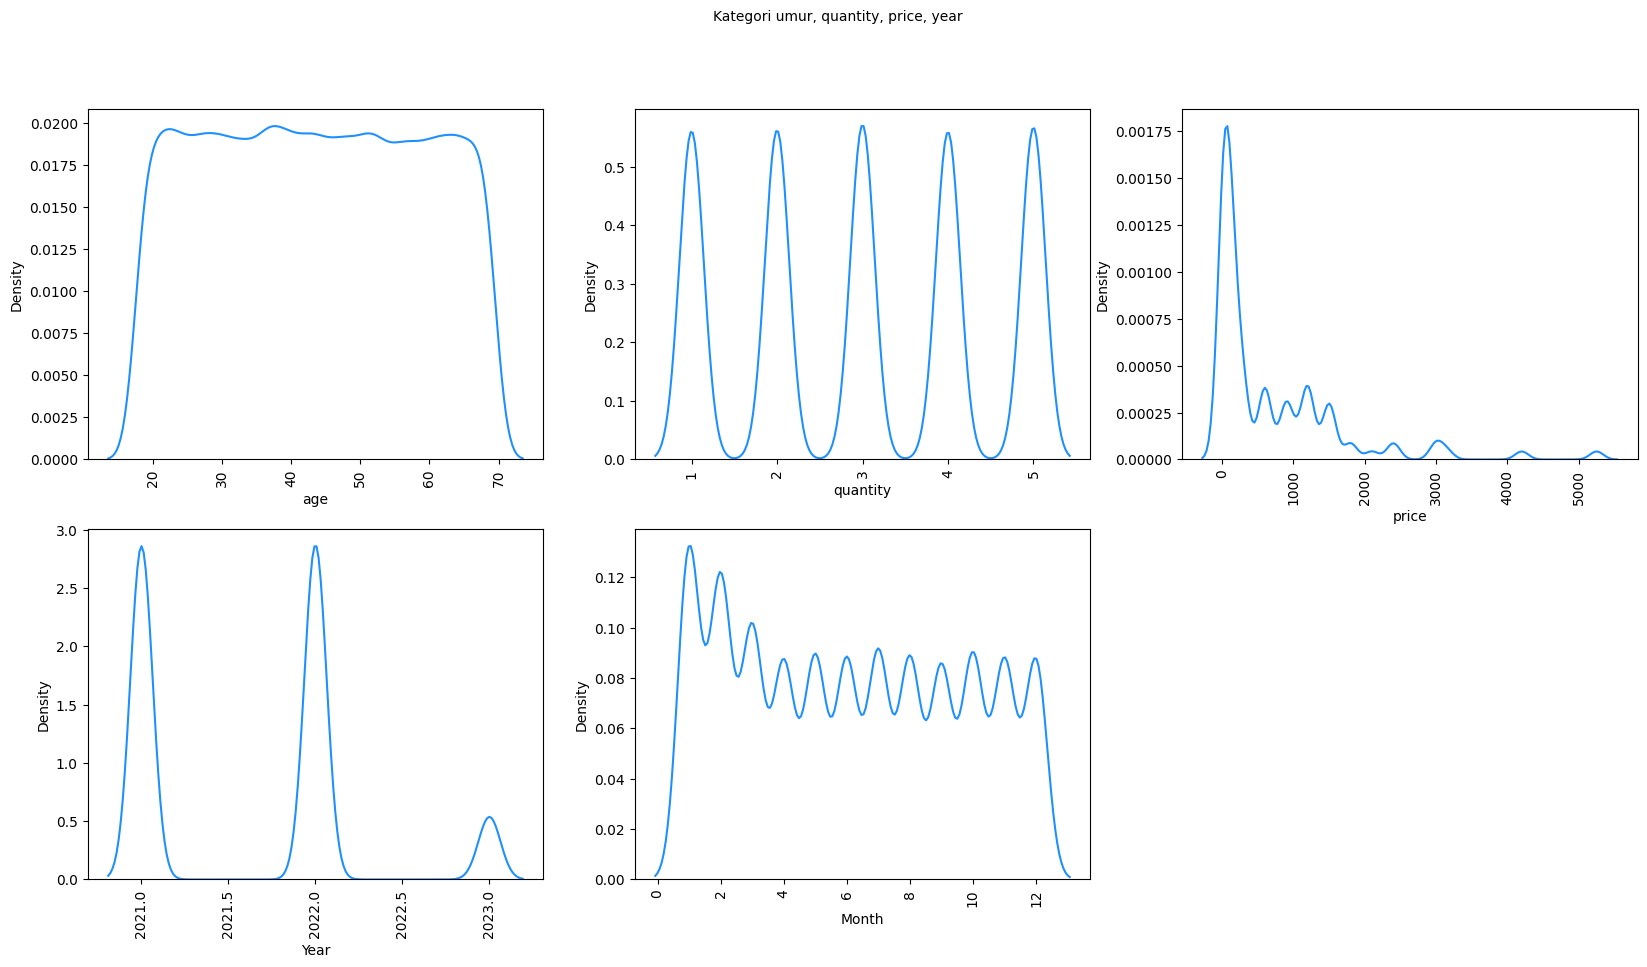

In [ ]:


temp = ['age','quantity','price','Year', 'Month']
plt.figure(figsize=(20,10))
x=1
for i in temp:
    plt.subplot(2,3,x)
    sns.kdeplot(x=df[i], color='dodgerblue')
    x+=1
    plt.xticks(rotation = 'vertical')
plt.suptitle('Kategori umur, quantity, price, year', fontsize=10)
plt.show()

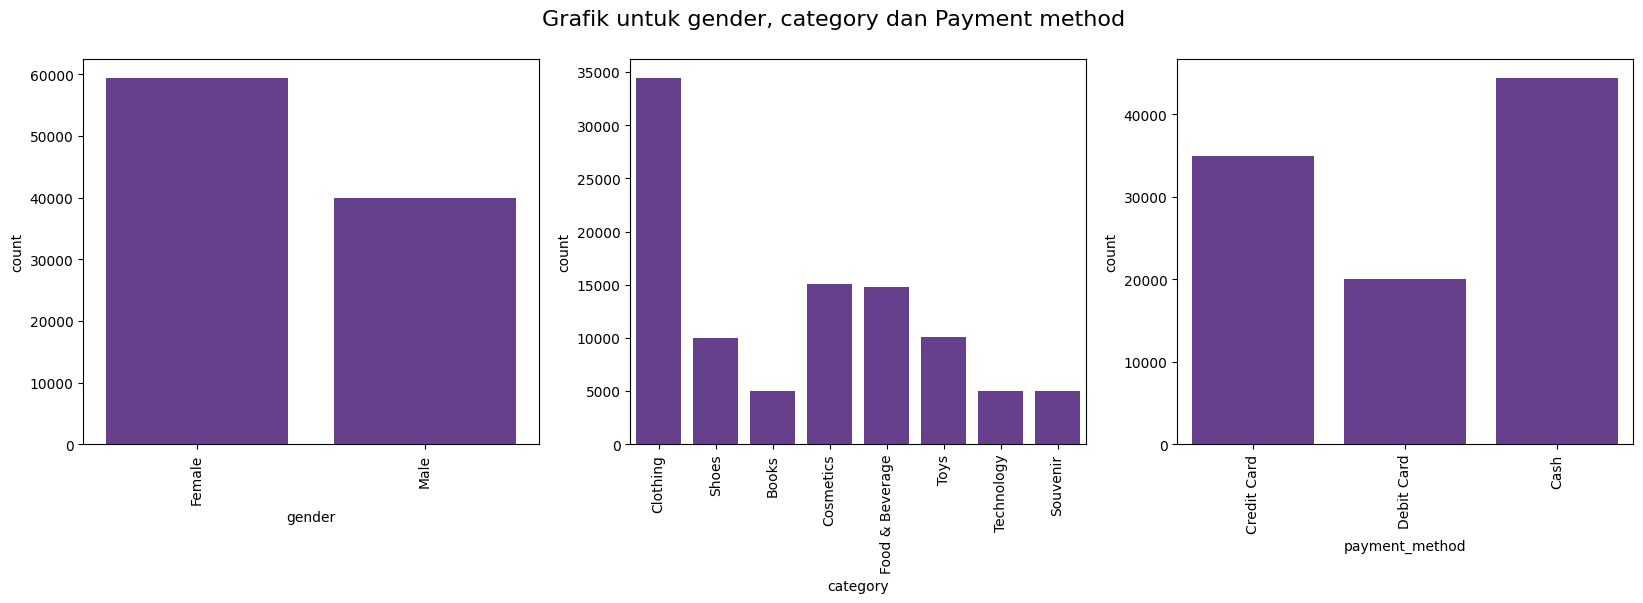

In [ ]:
temp = ['gender','category','payment_method']
plt.figure(figsize=(20,5))
x=1
for i in temp:
    plt.subplot(1,3,x)
    sns.countplot(x=df[i], color = 'rebeccapurple')
    x+=1
    plt.xticks(rotation = 'vertical')
plt.suptitle('Grafik untuk gender, category dan Payment method', fontsize=16)
plt.show()

In [ ]:
ages_buying_books = df[df['category'] == 'Books'].groupby('age')['age'].value_counts().sort_values(ascending= False)
ages_buying_books

age
33    110
56    110
51    109
50    109
24    109
43    108
28    106
18    106
22    106
46    104
67    104
55    103
49    103
64    103
36    102
41    102
25    101
39     99
69     99
68     98
40     98
31     98
38     97
34     97
48     97
62     96
57     96
37     95
63     95
61     95
58     95
29     95
23     95
59     94
53     94
19     94
60     93
65     92
30     91
47     90
20     89
21     88
54     88
27     87
26     86
52     84
44     83
66     82
35     80
42     78
45     78
32     70
Name: count, dtype: int64

In [ ]:
#Contoh pembelian buku dari berbagai usia
fig = px.bar(ages_buying_books,
            template='plotly_dark',
            title = 'Pembelian Buku',
             color=ages_buying_books.values,
             y=ages_buying_books.values,
             x=ages_buying_books.index,
             labels={'y':'Number of Books'}
            )
fig.show()

In [ ]:
ages_buying_cosmetics = df[df['category'] == 'Cosmetics'].groupby('age')['age'].value_counts().sort_values(ascending= False)
ages_buying_cosmetics

age
32    325
22    318
61    310
51    309
49    308
55    307
36    306
30    306
69    305
62    304
40    303
53    303
66    302
33    301
48    301
58    300
39    299
25    297
64    296
65    296
38    296
57    295
37    294
47    294
52    292
42    289
21    289
27    289
19    289
59    289
34    289
46    288
28    287
43    285
56    285
26    285
44    282
50    282
35    281
23    279
54    278
41    277
60    276
29    276
45    275
67    273
20    269
24    268
63    267
18    267
68    260
31    256
Name: count, dtype: int64

In [ ]:
#Contoh dalam pembelian Cosmetics
fig = px.bar(ages_buying_cosmetics,
            template='plotly_dark',
            title = 'Pembelian Cosmetic',
             color=ages_buying_cosmetics.values,
             y=ages_buying_cosmetics.values,
             x=ages_buying_cosmetics.index,
             labels={'y':'Number of Cosmetics bought'}
            )
fig.show()

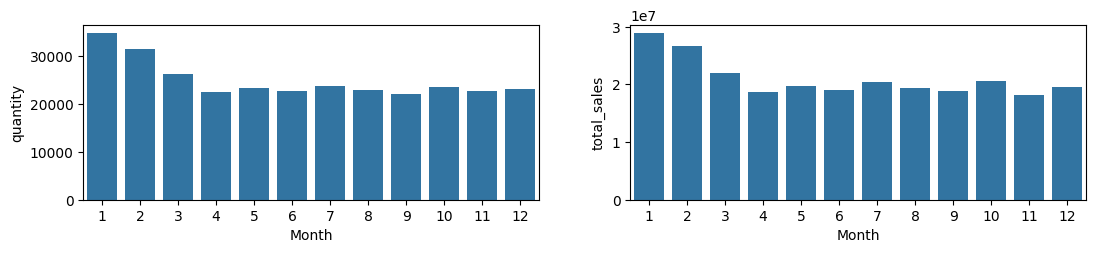

In [ ]:
temp = ['quantity', 'total_sales']
plt.figure(figsize=(20,5))
x=1
for i in temp:
    plt.subplot(2,3,x)
    x+=1
    sns.barplot(data = df, x = 'Month',y = i, estimator = 'sum', errorbar=None)
plt.show()

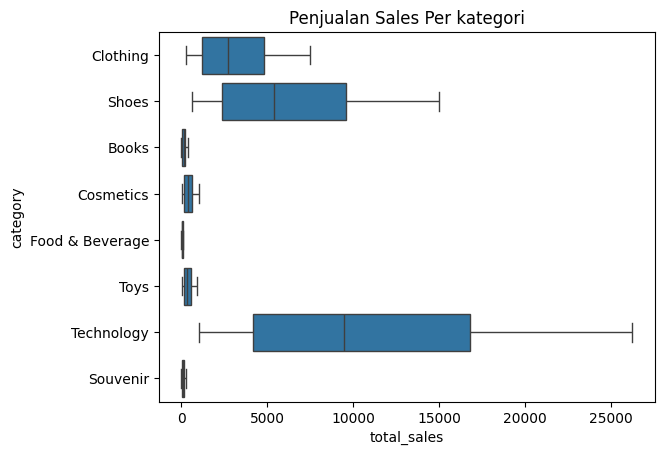

In [ ]:
sns.boxplot(x='total_sales', y='category', data=df)
plt.title('Penjualan Sales Per kategori')
plt.show()



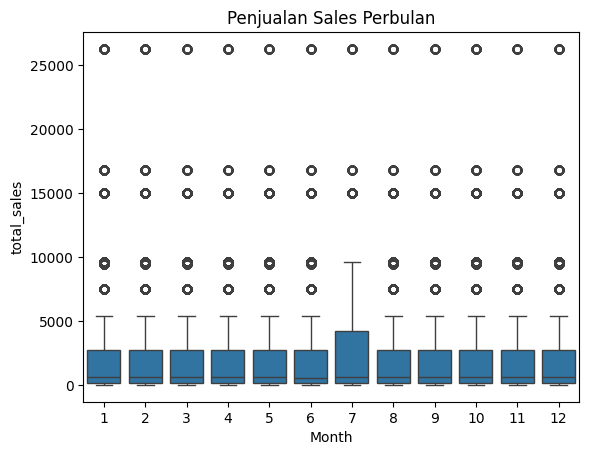

In [ ]:
sns.boxplot(x='Month', y='total_sales', data=df)
plt.title('Penjualan Sales Perbulan')
plt.show()

In [ ]:
malls = df['shopping_mall'].value_counts()
malls

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [ ]:
fig = fig = px.bar(malls,
            template='plotly_dark',
            title = 'Jenis Mall yang dikunjungi',
             color=malls.values,
             y=malls.values,
             x=malls.index,
             labels={'y':'Number of Customers in the mall'}
            )
fig.show()

In [ ]:
payment_method = df['payment_method'].value_counts()
payment_method

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [ ]:
fig = px.pie(values=payment_method,
            names= payment_method.index,
            template='plotly_dark',
            title = 'Different payment Methods',
            )
fig.show()

Melakukan train data di Machine Learning


In [ ]:
df.describe()

,age,quantity,price,invoice_date,total_sales,Day,Month,Year
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,2528.789268,15.569603,6.113898,2021.629408
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,5.230000,1.000000,1.000000,2021.000000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,136.350000,8.000000,3.000000,2021.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,600.170000,16.000000,6.000000,2022.000000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,2700.720000,23.000000,9.000000,2022.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,26250.000000,31.000000,12.000000,2023.000000
std,14.990054,1.413025,941.184567,NaN,4222.475781,8.799894,3.569511,0.636136


Label Encoding


Dalam penggunaan Label Encoding di tugas akhir ini saya menggunakan labelencoder karena Berfungsi dengan baik untuk fitur dengan tiga kategori

Preparing test data

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [86]:
df = pd.read_csv('/content/drive/MyDrive/customer_shopping_data.csv', sep=',')

In [87]:
def prepare_data(df, test_size=0.2):
    # select features
    features = ['age', 'price', 'invoice_date']
    target = 'quantity'

    # separate features and target
    train_features = df[features].copy()
    train_target = df[target].copy()

    # split data to train and test
    X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=test_size, random_state=42, stratify=train_target)

    #### Training data ####
    # fill missing value
    age_imputer = SimpleImputer(strategy='median')
    new_age = age_imputer.fit_transform(X_train[['age']])
    X_train['age'] = new_age.flatten()

    # export imputer
    export_object(age_imputer, output_name="age_imputer.joblib")

    # encode invoice_date
    invoice_date_labenc = LabelEncoder()
    encoded_invoice_date = invoice_date_labenc.fit_transform(X_train['invoice_date'])
    X_train['invoice_date'] = encoded_invoice_date

    # export invoice_date encoder
    export_object(invoice_date_labenc, output_name="invoice_date_labenc.joblib")

    # encode price
    price_labenc = LabelEncoder()
    encoded_price = price_labenc.fit_transform(X_train['price'])
    X_train['price'] = encoded_price

    # export price encoder
    export_object(price_labenc, output_name="price_labenc.joblib")


    #### Testing data ####
    test_new_age = age_imputer.transform(X_test[['age']])
    test_new_age
    X_test['age'] = test_new_age.flatten()

    test_encoded_invoice_date = invoice_date_labenc.transform(X_test['invoice_date'])
    X_test['invoice_date'] = test_encoded_invoice_date

    test_encoded_price = price_labenc.transform(X_test['price'])
    X_test['price'] = test_encoded_price

    return X_train, X_test, y_train, y_test

In [88]:
def evaluate(labels, predictions, classes=None):
    print(f"Accuracy: {accuracy_score(labels, predictions):.3f}")
    print(f"F1 Score: {f1_score(labels, predictions, average='micro'):.3f}")
    print(classification_report(labels, predictions))

    cm = confusion_matrix(labels, predictions, labels=classes)
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot()
    plt.show()

In [89]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    evaluate(y_test, predictions, classes=model.classes_)

    return model

In [90]:
def export_object(obj, output_name):
    joblib.dump(obj, output_name)

In [91]:
def run_ml(model, data_path, test_size=0.2, output_name="model.joblib"):
    # read data
    df = read_data(data_path)

    # preprocess data
    X_train, X_test, y_train, y_test = prepare_data(df, test_size)

    # train model
    model = train_evaluate_model(model, X_train, X_test, y_train, y_test)

    # export model
    export_object(model, output_name=output_name)


Dalam pemilih model clasification ini saya memilih Decision Tree karena untuk penilaian akurasi dan F1 Scorenya yang lebih tinggi yaitu mencapai 1.00 dibandingkan model lainnya.

KNN Model

Accuracy: 0.484
F1 Score: 0.484
              precision    recall  f1-score   support

           1       0.50      0.64      0.56      3953
           2       0.40      0.42      0.41      3966
           3       0.48      0.47      0.47      4030
           4       0.54      0.49      0.51      3945
           5       0.52      0.40      0.45      3998

    accuracy                           0.48     19892
   macro avg       0.49      0.48      0.48     19892
weighted avg       0.49      0.48      0.48     19892



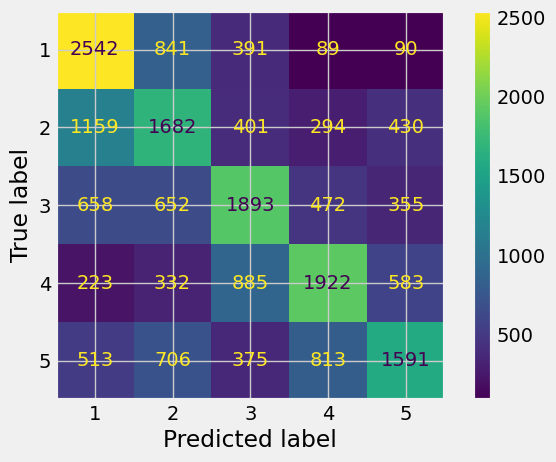

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

print('KNN Model')
print()
run_ml(knn, data_path='/content/drive/MyDrive/customer_shopping_data.csv', test_size=0.2, output_name="knn.joblib")

Decision Tree Model

Accuracy: 1.000
F1 Score: 1.000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3953
           2       1.00      1.00      1.00      3966
           3       1.00      1.00      1.00      4030
           4       1.00      1.00      1.00      3945
           5       1.00      1.00      1.00      3998

    accuracy                           1.00     19892
   macro avg       1.00      1.00      1.00     19892
weighted avg       1.00      1.00      1.00     19892



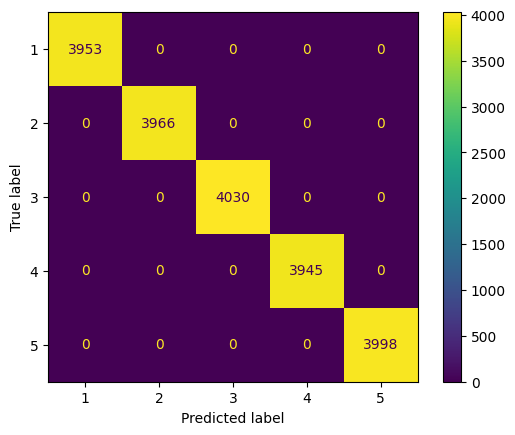

In [ ]:
dtree = DecisionTreeClassifier(random_state=100)

print('Decision Tree Model')
print()
run_ml(dtree, data_path='/content/drive/MyDrive/customer_shopping_data.csv', test_size=0.2, output_name="dtree.joblib")

Random Forest Model

Accuracy: 0.959
F1 Score: 0.959
              precision    recall  f1-score   support

           1       0.94      0.98      0.96      3953
           2       0.96      0.95      0.96      3966
           3       0.97      0.95      0.96      4030
           4       0.97      0.96      0.96      3945
           5       0.96      0.95      0.96      3998

    accuracy                           0.96     19892
   macro avg       0.96      0.96      0.96     19892
weighted avg       0.96      0.96      0.96     19892



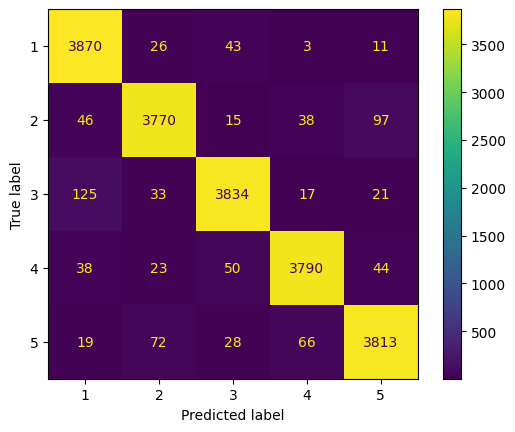

In [ ]:
RFC = RandomForestClassifier(n_estimators=100, random_state=0)

print('Random Forest Model')
print()
run_ml(rfc, data_path='/content/drive/MyDrive/customer_shopping_data.csv', test_size=0.2, output_name="rfc.joblib")